# Increase Brightness

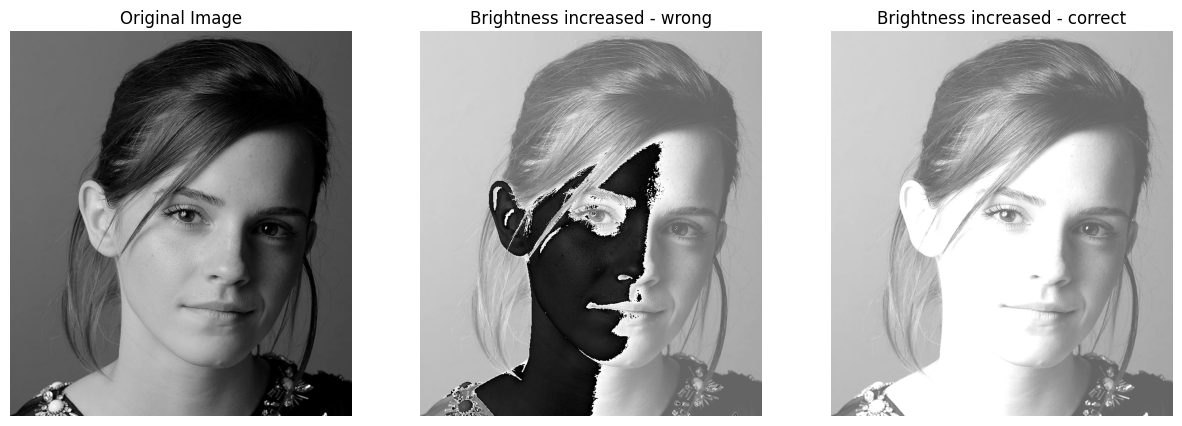

In [1]:
## increase brightness

import cv2 as cv
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt

im1=cv.imread('img/emma.jpg',cv.IMREAD_GRAYSCALE)  #read image as grayscale
assert im1 is not None

im2=im1+100  
## Adding 100 to each pixel using im2 = im1 + 100 may result in values exceeding 255, causing overflow.
## When values exceed 255 due to addition, they are truncated back to the 0-255 range (256 becomes 0).

im3=cv.add(im1,100)  ## Adds the scalar value 100 to each pixel value in im1, producing the modified image im2
## cv.add(im1, 100) handles overflow differently by clipping values at 255, ensuring no overflow occurs beyond the 0-255 range

fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(15,8))   ## a grid with 2 subplots in 1 row
ax[0].imshow(cv.cvtColor(im1,cv.COLOR_BGR2RGB),cmap=cm.gray,vmin=0,vmax=255)  ## cmap: colormap used for displaying the image. ## cm.gray -> grayscale colormap.
ax[1].imshow(cv.cvtColor(im2,cv.COLOR_BGR2RGB),cmap=cm.gray,vmin=0,vmax=255)  ## vmin, vmax: min,max values of colormap. In grayscale images, 0 -> black , 255 -> white
ax[2].imshow(cv.cvtColor(im3,cv.COLOR_BGR2RGB),cmap=cm.gray,vmin=0,vmax=255)
ax[0].set_title('Original Image')
ax[1].set_title('Brightness increased - wrong')
ax[2].set_title('Brightness increased - correct')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

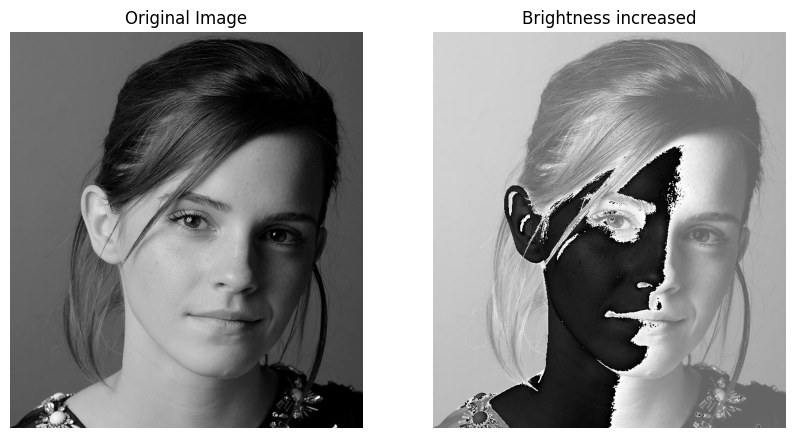

In [2]:
## increase brigthness using loops (slow)

import cv2 as cv
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt

im1=cv.imread('img/emma.jpg',cv.IMREAD_GRAYSCALE)  #read image as grayscale
im2 =np.zeros_like(im1)
for i in range(im1.shape[0]):
    for j in range(im1.shape[1]):
        im2[i,j]=im1[i,j]+100

fig,ax=plt.subplots(nrows=1,ncols=2,figsize=(10,8))  
ax[0].imshow(cv.cvtColor(im1,cv.COLOR_BGR2RGB),cmap=cm.gray,vmin=0,vmax=255)
ax[1].imshow(cv.cvtColor(im2,cv.COLOR_BGR2RGB),cmap=cm.gray,vmin=0,vmax=255)  
ax[0].set_title('Original Image')
ax[1].set_title('Brightness increased')
ax[0].axis('off')
ax[1].axis('off')
plt.show()

# Color Planes

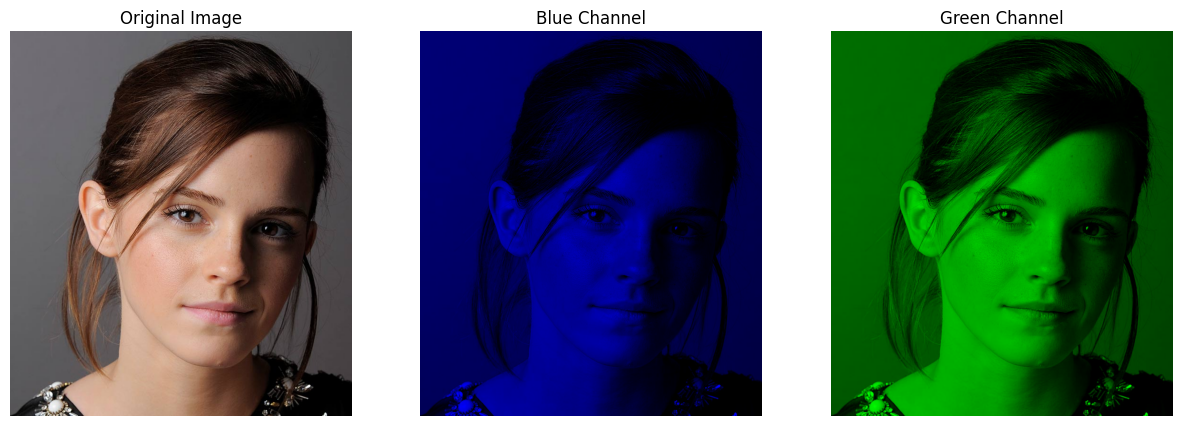

In [3]:
## obtaining one color plane

import cv2 as cv
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt

im=cv.imread('img/emma.jpg') 
im_blue=im.copy()    ## creates a deep copy of im into im_blue. Any modifications made to im_blue do not affect the original im.
im_blue[:,:,1]=0     ## accesses all rows and columns (:) of the green channel (1 in OpenCV's BGR channel order) of im_blue and sets them to 0, effectively removing the green color from the image.
im_blue[:,:,2]=0     ## accesses all rows and columns (:) of the red channel (2 in OpenCV's BGR channel order) of im_blue and sets them to 0, effectively removing the red color from the image.

im_green=im.copy()
im_green[:,:,0]=0
im_green[:,:,2]=0

fig,ax=plt.subplots(1,3,figsize=(15,8))  
ax[0].imshow(cv.cvtColor(im,cv.COLOR_BGR2RGB))
ax[1].imshow(cv.cvtColor(im_blue,cv.COLOR_BGR2RGB))  
ax[2].imshow(cv.cvtColor(im_green,cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].set_title('Blue Channel')
ax[2].set_title('Green Channel')
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')
plt.show()

# Different Channels

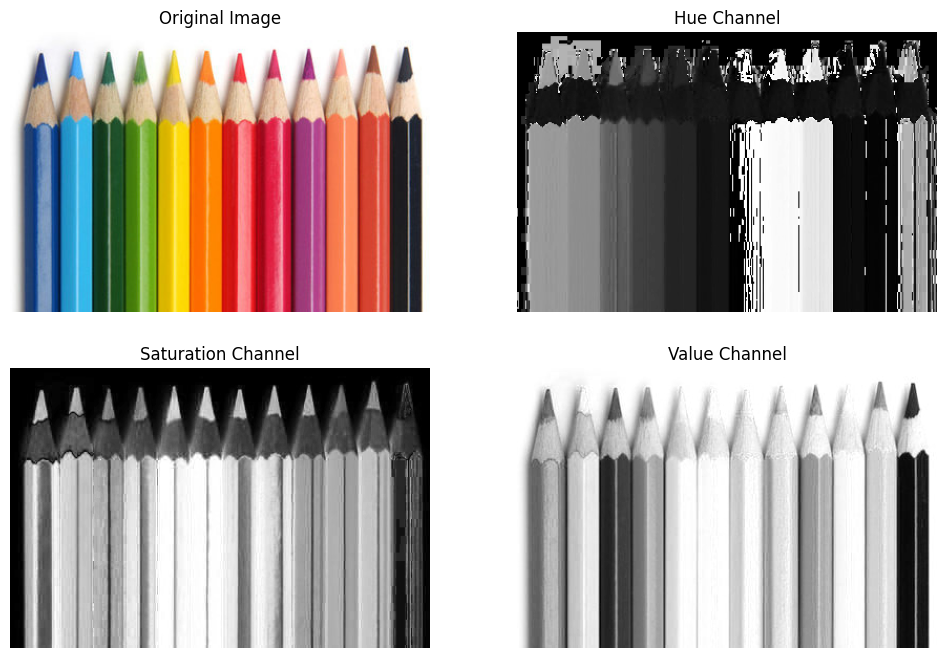

In [1]:
# different channels

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im = cv.imread('img/pencils.jpg')
im_hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)
fig, ax = plt.subplots(2, 2, figsize=(12, 8))
ax[0, 0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0, 0].set_title('Original Image')
ax[0, 1].imshow(im_hsv[:,:,0], cmap='gray')
ax[0, 1].set_title('Hue Channel')
ax[1, 0].imshow(im_hsv[:,:,1], cmap='gray')
ax[1, 0].set_title('Saturation Channel')
ax[1, 1].imshow(im_hsv[:,:,2], cmap='gray')
ax[1, 1].set_title('Value Channel')
for a in ax.ravel():
    a.axis('off')
plt.show()

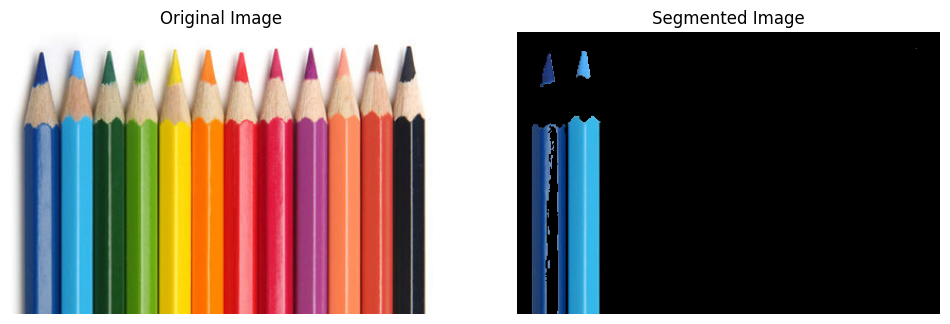

In [2]:
# Segment the light-blue pencil from the image

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
im = cv.imread('img/pencils.jpg')
im_hsv = cv.cvtColor(im, cv.COLOR_BGR2HSV)
mask = cv.inRange(im_hsv, (90, 100, 100), (130, 255, 255))
im_segmented = cv.bitwise_and(im, im, mask=mask)
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
ax[0].imshow(cv.cvtColor(im, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv.cvtColor(im_segmented, cv.COLOR_BGR2RGB))
ax[1].set_title('Segmented Image')
for a in ax:
    a.axis('off')
plt.show()